In [1]:
import mplfinance as mpf
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

In [2]:
API_key = 'MCO3JQL81ATB1YZ0'
time = TimeSeries(key = API_key,output_format='pandas')

In [7]:
def VWAPWAP(ticker,cash):
    data = time.get_intraday(symbol=ticker,interval='1min',outputsize='full')
    df = data[0]
    df = df.rename(columns={"1. open":"Open","2. high":"High","3. low":"Low","4. close":"Close","5. volume":"Volume"})
    result = [group[1] for group in df.groupby(df.index.day)]
    VWAP_cross_returns = 0
    for df_vwap in result:
        df_vwap = df_vwap.loc[(df_vwap.index >= f'{df_vwap.index.date[0]} 9:30:00')]
        df_vwap = df_vwap.loc[(df_vwap.index.hour <= 15)]
        df_vwap = df_vwap.resample('5T').agg({'Open':'first','High':'max','Low':'min','Close':'last','Volume':'sum'})
        df_vwap['VWAP'] = (((df_vwap['High']+df_vwap['Low']+df_vwap['Close'])*df_vwap['Volume']/3).cumsum())/df_vwap['Volume'].cumsum()
        df_vwap['TWAP'] = df_vwap['High']
        df_vwap = df_vwap.dropna()
        vwap = mpf.make_addplot(df_vwap['VWAP'])
        mpf.plot(df_vwap,addplot=vwap,type='candle',style='yahoo',volume=True,title=f"{df_vwap.index.date[0]} {ticker} VWAP")
        VWAP_cross_returns += VWAP_cross_strategy(ticker,df_vwap,cash)
    print(VWAP_cross_returns)
    return 

In [4]:
# Buys when price goes above VWAP and shorts when it goes below 
def VWAP_cross_strategy(ticker,df_vwap,cash): 
    shares = 0
    cash0 = cash
    print(f'{df_vwap.index.date[0]}')
    for index,row in df_vwap.iterrows():
        if ((row['VWAP'] < row['Close']) and (row['VWAP'] < row['Open']) and cash):
            shares = cash/row['Close']
            print(f"{index.time()}: Buy {shares:.3f} {ticker} shares at {row['Close']} per share")
            cash = 0
        if ((row['VWAP'] > row['Close']) and (row['VWAP'] < row['Open']) and not cash):
            cash = shares*row['Close']
            print(f"{index.time()}: Sell {shares:.3f} {ticker} shares at {row['Close']} per share")
            shares = 0
        price = row['Close']
    cash = cash + shares*price
    print(f'Cash: {cash}')
    returns = (cash - cash0)/cash0
    print(f'Return: {returns*100:.2f}%')
    return returns

In [5]:
def VWAP_mean_reversion_strategy(ticker,df_vwap,cash):
    shares = 0
    cash0 = cash
    print(f'{df_vwap.index.date[0]}')
    return

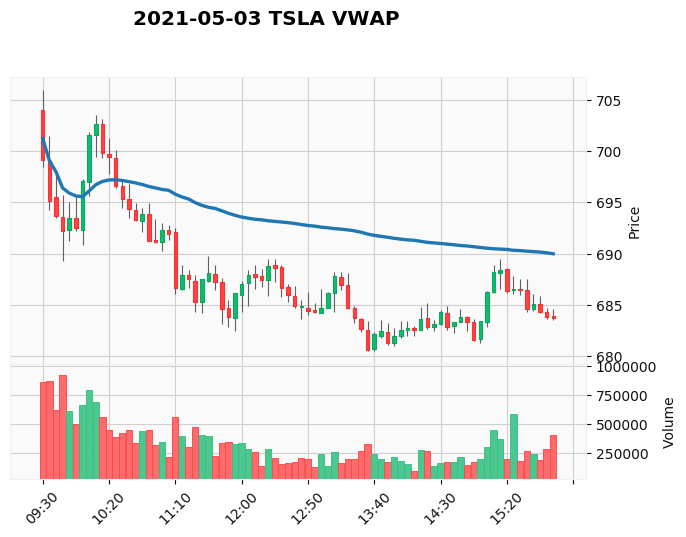

2021-05-03
10:05:00: Buy 1.425 TSLA shares at 701.5678 per share
10:25:00: Sell 1.425 TSLA shares at 696.58 per share
Cash: 992.8904946891805
Return: -0.71%


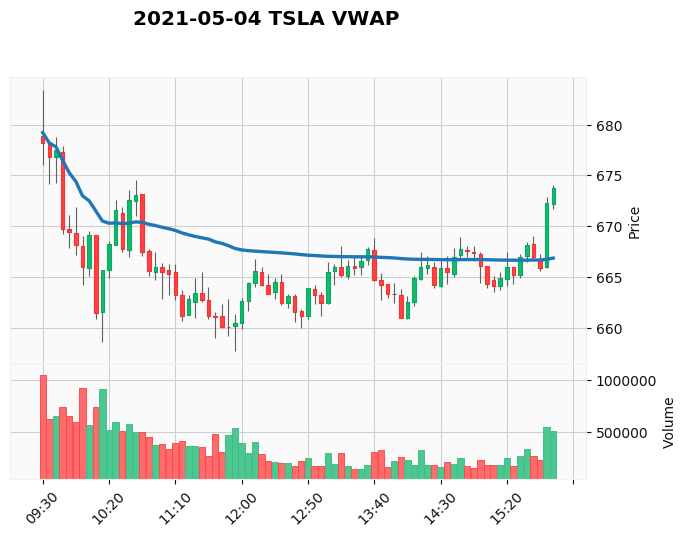

2021-05-04
10:40:00: Buy 1.486 TSLA shares at 673.03 per share
10:45:00: Sell 1.486 TSLA shares at 667.4315 per share
14:45:00: Buy 1.485 TSLA shares at 667.78 per share
15:00:00: Sell 1.485 TSLA shares at 666.1235 per share
15:35:00: Buy 1.481 TSLA shares at 668.1339 per share
15:45:00: Sell 1.481 TSLA shares at 665.91 per share
15:55:00: Buy 1.463 TSLA shares at 673.73 per share
Cash: 985.929027339702
Return: -1.41%


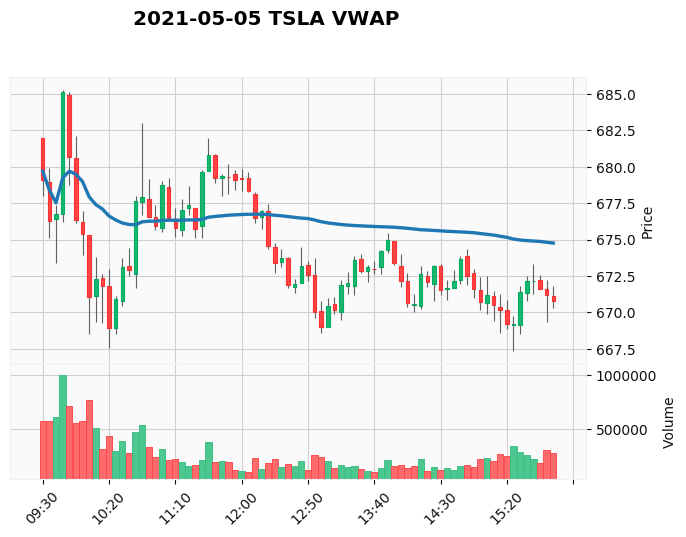

2021-05-05
09:50:00: Buy 1.469 TSLA shares at 680.67 per share
09:55:00: Sell 1.469 TSLA shares at 676.34 per share
10:45:00: Buy 1.466 TSLA shares at 677.9 per share
10:55:00: Sell 1.466 TSLA shares at 675.9008 per share
11:05:00: Buy 1.465 TSLA shares at 676.4642 per share
11:10:00: Sell 1.465 TSLA shares at 675.77 per share
11:20:00: Buy 1.461 TSLA shares at 677.3813 per share
11:25:00: Sell 1.461 TSLA shares at 675.73 per share
11:35:00: Buy 1.450 TSLA shares at 680.8151 per share
12:10:00: Sell 1.450 TSLA shares at 676.5 per share
Cash: 981.0214396870896
Return: -1.90%


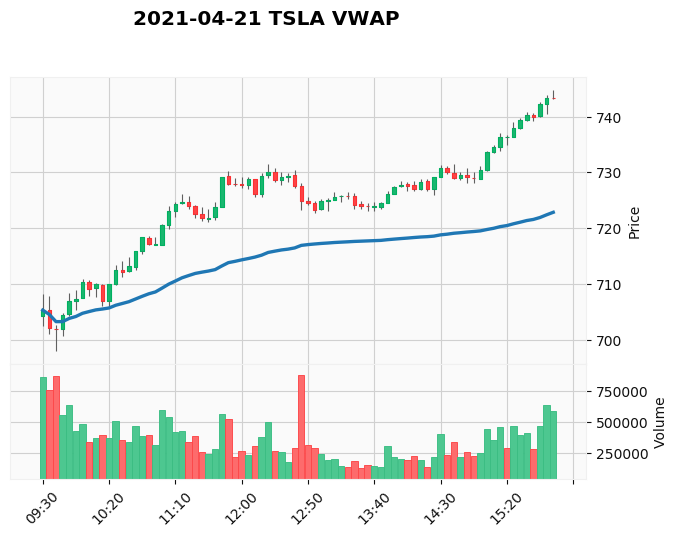

2021-04-21
09:50:00: Buy 1.414 TSLA shares at 706.9901 per share
Cash: 1051.3442833216475
Return: 5.13%


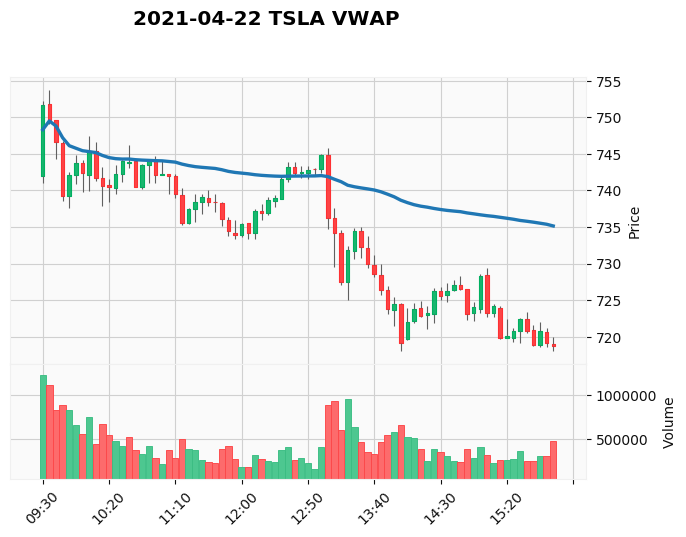

2021-04-22
09:35:00: Buy 1.334 TSLA shares at 749.5301 per share
09:40:00: Sell 1.334 TSLA shares at 746.56 per share
12:40:00: Buy 1.342 TSLA shares at 742.4316 per share
13:05:00: Sell 1.342 TSLA shares at 736.18 per share
Cash: 987.6503119216018
Return: -1.23%


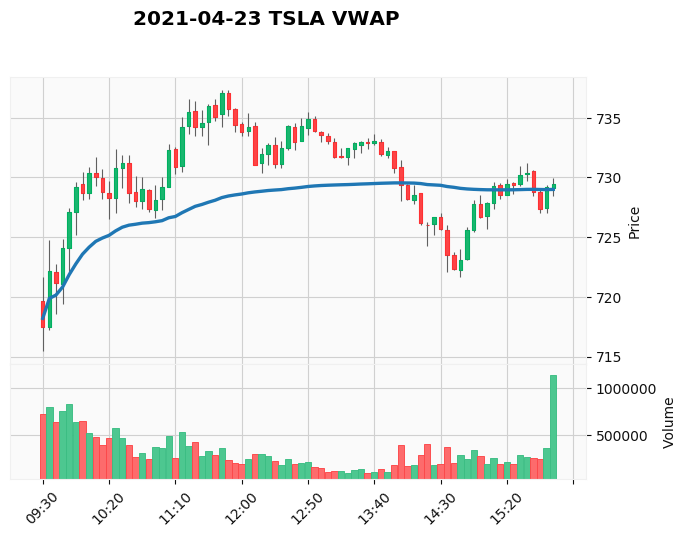

2021-04-23
09:40:00: Buy 1.387 TSLA shares at 721.14 per share
14:00:00: Sell 1.387 TSLA shares at 729.3492 per share
15:25:00: Buy 1.387 TSLA shares at 729.39 per share
15:40:00: Sell 1.387 TSLA shares at 728.82 per share
15:55:00: Buy 1.385 TSLA shares at 729.46 per share
Cash: 1010.5932716035406
Return: 1.06%


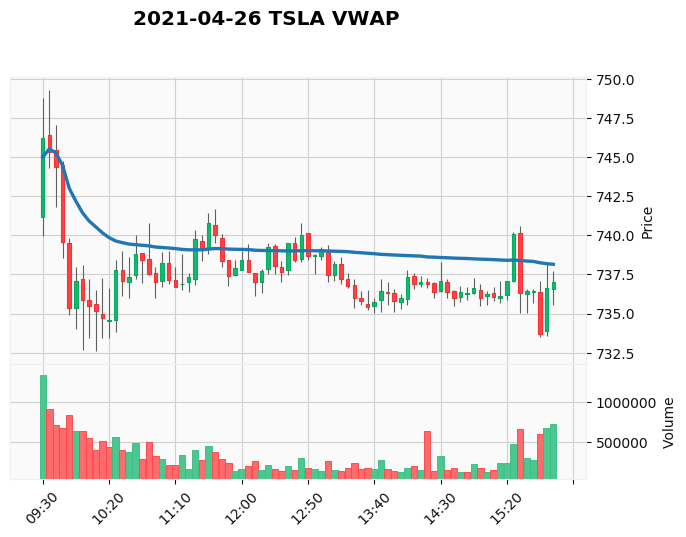

2021-04-26
11:30:00: Buy 1.353 TSLA shares at 739.1327 per share
11:45:00: Sell 1.353 TSLA shares at 738.34 per share
Cash: 998.9275268162266
Return: -0.11%


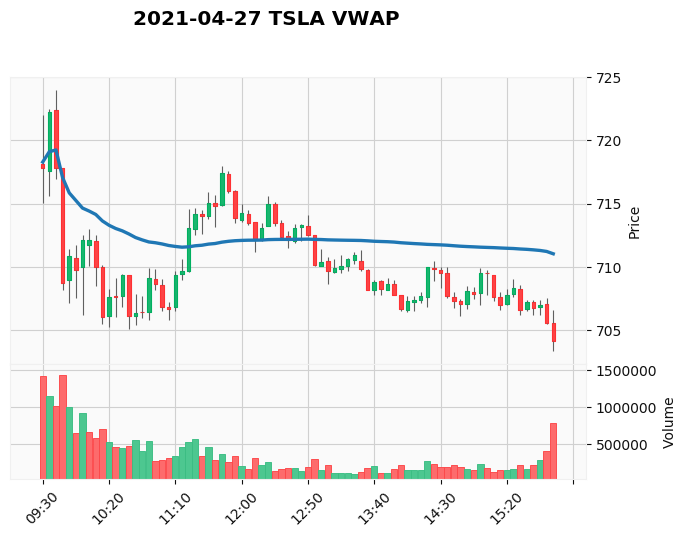

2021-04-27
11:25:00: Buy 1.400 TSLA shares at 714.2101 per share
12:35:00: Sell 1.400 TSLA shares at 712.0981 per share
12:45:00: Buy 1.398 TSLA shares at 713.3 per share
12:55:00: Sell 1.398 TSLA shares at 710.18 per share
Cash: 992.6817853094946
Return: -0.73%


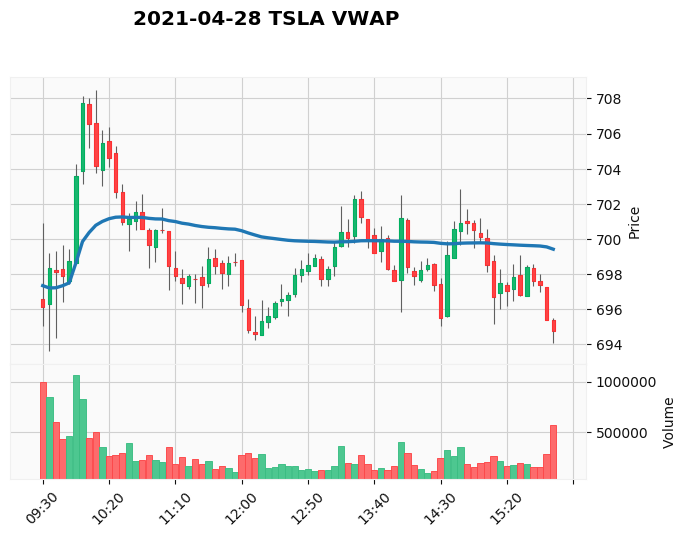

2021-04-28
09:40:00: Buy 1.432 TSLA shares at 698.1001 per share
10:30:00: Sell 1.432 TSLA shares at 700.945 per share
13:20:00: Buy 1.434 TSLA shares at 700.034 per share
13:40:00: Sell 1.434 TSLA shares at 699.1961 per share
14:45:00: Buy 1.431 TSLA shares at 700.9164 per share
15:05:00: Sell 1.431 TSLA shares at 698.5301 per share
Cash: 999.4590583713532
Return: -0.05%


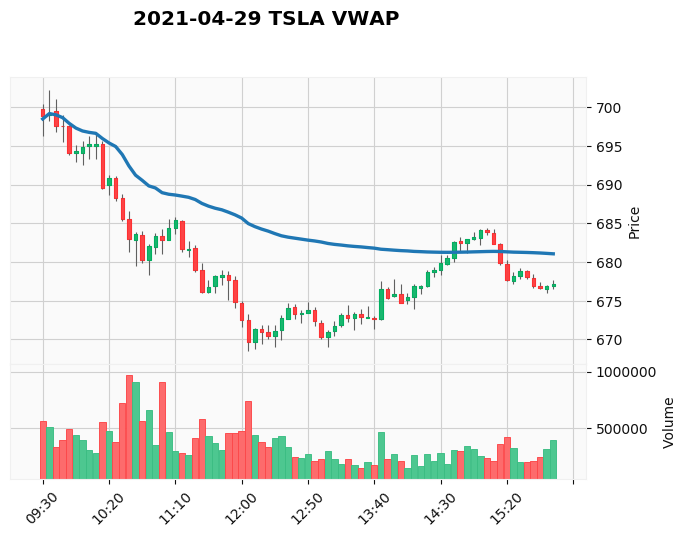

2021-04-29
09:30:00: Buy 1.431 TSLA shares at 698.8046 per share
09:40:00: Sell 1.431 TSLA shares at 697.6 per share
14:45:00: Buy 1.463 TSLA shares at 682.4401 per share
15:15:00: Sell 1.463 TSLA shares at 679.8456 per share
Cash: 994.4809537735348
Return: -0.55%


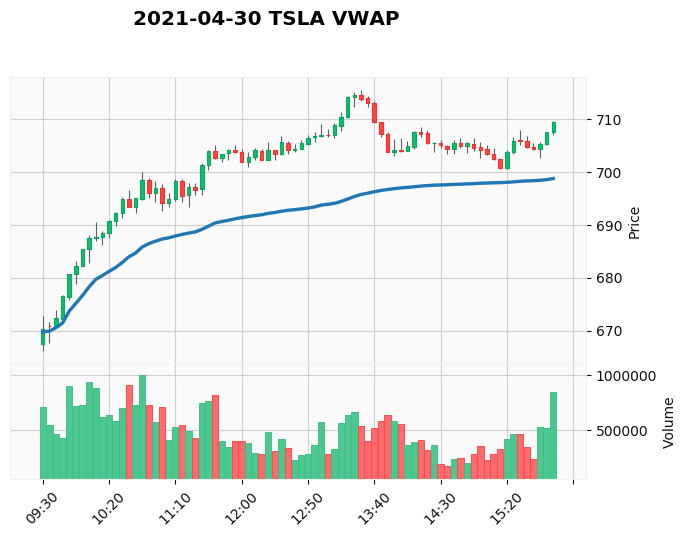

2021-04-30
09:35:00: Buy 1.490 TSLA shares at 670.9178 per share
Cash: 1057.2830233450356
Return: 5.73%
0.052261176178406796


ValueError: Thank you for using Alpha Vantage! Our standard API call frequency is 5 calls per minute and 500 calls per day. Please visit https://www.alphavantage.co/premium/ if you would like to target a higher API call frequency.

In [8]:
stocks = ['TSLA','AAPL','GME','AMZN','MSFT']
for stock in stocks:
    VWAPWAP(stock,1000)